In [1]:
!gdown --id 1Q9j1a83CuKzsHCGaNulSkNxBm7Dkn7Ln

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q9j1a83CuKzsHCGaNulSkNxBm7Dkn7Ln
To: /content/assin2-train-only.xml
100% 1.51M/1.51M [00:00<00:00, 167MB/s]


In [2]:
!gdown --id 1kb7xq6Mb3eaqe9cOAo70BaG9ypwkIqEU
!gdown --id 1J3FpQaHxpM-FDfBUyooh-sZF-B-bM_lU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kb7xq6Mb3eaqe9cOAo70BaG9ypwkIqEU
To: /content/assin2-dev.xml
100% 116k/116k [00:00<00:00, 121MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J3FpQaHxpM-FDfBUyooh-sZF-B-bM_lU
To: /content/assin2-test.xml
100% 493k/493k [00:00<00:00, 176MB/s]


In [3]:
import pandas as pd

In [4]:
df_train = pd.read_xml('assin2-train-only.xml')
df_train = df_train.drop(columns=['id', 'similarity'])
df_train.head()

,entailment,t,h
0,Entailment,Uma criança risonha está segurando uma pistola...,Uma criança está segurando uma pistola de água
1,Entailment,Os homens estão cuidadosamente colocando as ma...,Os homens estão colocando bagagens dentro do p...
2,Entailment,Uma pessoa tem cabelo loiro e esvoaçante e est...,Um guitarrista tem cabelo loiro e esvoaçante
3,Entailment,Batatas estão sendo fatiadas por um homem,O homem está fatiando a batata
4,Entailment,Um caminhão está descendo rapidamente um morro,Um caminhão está rapidamente descendo o morro


In [5]:
df_val = pd.read_xml('assin2-dev.xml')
df_val = df_val.drop(columns=['id', 'similarity'])
df_test = pd.read_xml('assin2-test.xml')
df_test = df_test.drop(columns=['id', 'similarity'])

In [6]:
from gensim.models import KeyedVectors

In [7]:
!wget -c http://143.107.183.175:22980/download.php?file=embeddings/fasttext/cbow_s50.zip -O fasttext_cbow_s50.zip

--2023-05-02 23:55:59--  http://143.107.183.175:22980/download.php?file=embeddings/fasttext/cbow_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157365622 (150M) [application/octet-stream]
Saving to: ‘fasttext_cbow_s50.zip’

fasttext_cbow_s50.z 100%[===================>] 150.08M  11.2MB/s    in 14s     

2023-05-02 23:56:14 (10.4 MB/s) - ‘fasttext_cbow_s50.zip’ saved [157365622/157365622]



In [8]:
!unzip fasttext_cbow_s50.zip

Archive:  fasttext_cbow_s50.zip
  inflating: cbow_s50.txt            


In [9]:
gensim_vectors = KeyedVectors.load_word2vec_format('cbow_s50.txt')

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
import re

sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')

# Punctuation list
punctuations = re.escape('!"#%\'()*+,./:;<=>?@[\\]^_`{|}~')

# ##### #
# Regex #
# ##### #
re_remove_brackets = re.compile(r'\{.*\}')
re_remove_html = re.compile(r'<(\/|\\)?.+?>', re.UNICODE)
re_transform_numbers = re.compile(r'\d', re.UNICODE)
re_transform_emails = re.compile(r'[^\s]+@[^\s]+', re.UNICODE)
re_transform_url = re.compile(r'(http|https)://[^\s]+', re.UNICODE)
# Different quotes are used.
re_quotes_1 = re.compile(r"(?u)(^|\W)[‘’′`']", re.UNICODE)
re_quotes_2 = re.compile(r"(?u)[‘’`′'](\W|$)", re.UNICODE)
re_quotes_3 = re.compile(r'(?u)[‘’`′“”]', re.UNICODE)
re_dots = re.compile(r'(?<!\.)\.\.(?!\.)', re.UNICODE)
re_punctuation = re.compile(r'([,";:]){2},', re.UNICODE)
re_hiphen = re.compile(r' -(?=[^\W\d_])', re.UNICODE)
re_tree_dots = re.compile(u'…', re.UNICODE)
# Differents punctuation patterns are used.
re_punkts = re.compile(r'(\w+)([%s])([ %s])' %
                       (punctuations, punctuations), re.UNICODE)
re_punkts_b = re.compile(r'([ %s])([%s])(\w+)' %
                         (punctuations, punctuations), re.UNICODE)
re_punkts_c = re.compile(r'(\w+)([%s])$' % (punctuations), re.UNICODE)
re_changehyphen = re.compile(u'–')
re_doublequotes_1 = re.compile(r'(\"\")')
re_doublequotes_2 = re.compile(r'(\'\')')
re_trim = re.compile(r' +', re.UNICODE)

In [12]:
def clean_text(text):
    """Apply all regex above to a given string."""
    text = text.lower()
    text = text.replace('\xa0', ' ')
    text = re_tree_dots.sub('...', text)
    text = re.sub('\.\.\.', '', text)
    text = re_remove_brackets.sub('', text)
    text = re_changehyphen.sub('-', text)
    text = re_remove_html.sub(' ', text)
    text = re_transform_numbers.sub('0', text)
    text = re_transform_url.sub('URL', text)
    text = re_transform_emails.sub('EMAIL', text)
    text = re_quotes_1.sub(r'\1"', text)
    text = re_quotes_2.sub(r'"\1', text)
    text = re_quotes_3.sub('"', text)
    text = re.sub('"', '', text)
    text = re_dots.sub('.', text)
    text = re_punctuation.sub(r'\1', text)
    text = re_hiphen.sub(' - ', text)
    text = re_punkts.sub(r'\1 \2 \3', text)
    text = re_punkts_b.sub(r'\1 \2 \3', text)
    text = re_punkts_c.sub(r'\1 \2', text)
    text = re_doublequotes_1.sub('\"', text)
    text = re_doublequotes_2.sub('\'', text)
    text = re_trim.sub(' ', text)
    return text.strip()

In [13]:
def text_preprocessing(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: clean_text(x))
    return df

In [14]:
df_cleaned_train = text_preprocessing(df_train, 't')
df_cleaned_train = text_preprocessing(df_cleaned_train, 'h')
df_cleaned_train.head()

,entailment,t,h
0,Entailment,uma criança risonha está segurando uma pistola...,uma criança está segurando uma pistola de água
1,Entailment,os homens estão cuidadosamente colocando as ma...,os homens estão colocando bagagens dentro do p...
2,Entailment,uma pessoa tem cabelo loiro e esvoaçante e est...,um guitarrista tem cabelo loiro e esvoaçante
3,Entailment,batatas estão sendo fatiadas por um homem,o homem está fatiando a batata
4,Entailment,um caminhão está descendo rapidamente um morro,um caminhão está rapidamente descendo o morro


In [15]:
df_cleaned_train['entailment'] = df_cleaned_train.entailment.replace({'None': 0, 'Entailment': 1})
df_cleaned_train

,entailment,t,h
0,1,uma criança risonha está segurando uma pistola...,uma criança está segurando uma pistola de água
1,1,os homens estão cuidadosamente colocando as ma...,os homens estão colocando bagagens dentro do p...
2,1,uma pessoa tem cabelo loiro e esvoaçante e est...,um guitarrista tem cabelo loiro e esvoaçante
3,1,batatas estão sendo fatiadas por um homem,o homem está fatiando a batata
4,1,um caminhão está descendo rapidamente um morro,um caminhão está rapidamente descendo o morro
...,...,...,...
6495,0,um homem está apaixonadamente tocando um violão,um homem está guardando um violão
6496,0,um pimentão está sendo cortado em pedaços por ...,a pessoa está fatiando um dente de alho em ped...
6497,0,"um cachorro , que é preto , e um branco estão ...","um cachorro , que é preto , e um branco estão ..."
6498,0,alguns animais estão brincando na água,um jogador de pingue-pongue encontra-se com du...


In [16]:
from keras.utils import to_categorical
y_train = to_categorical(df_cleaned_train.entailment.values)

In [17]:
df_val['entailment'] = df_val.entailment.replace({'None': 0, 'Entailment': 1})
df_test['entailment'] = df_test.entailment.replace({'None': 0, 'Entailment': 1})

In [18]:
y_test = to_categorical(df_test.entailment.values)
y_val = to_categorical(df_val.entailment.values)

In [19]:
from keras.preprocessing.text import Tokenizer

In [20]:
df_cleaned_train['sentence'] = df_cleaned_train['t'] + ' [SEP] ' + df_cleaned_train['h']
df_val['sentence'] = df_val['t'] + ' [SEP] ' + df_val['h']
df_test['sentence'] = df_test['t'] + ' [SEP] ' + df_test['h']

In [21]:
num_words = 10000
tokenizer = Tokenizer(num_words, lower=True)
df_total = pd.concat([df_cleaned_train.sentence, df_val.sentence], axis=0)
# df_total.head()
tokenizer.fit_on_texts(df_total)

In [63]:
df_cleaned_train['sentence'].str.split().str.len().max()

60

In [22]:
from keras.utils import pad_sequences

In [23]:
X_train = tokenizer.texts_to_sequences(df_cleaned_train['sentence'])
X_train_pad = pad_sequences(X_train, maxlen=75, padding='post')
X_test = tokenizer.texts_to_sequences(df_test.sentence)
X_test_pad = pad_sequences(X_test, maxlen = 75, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.sentence)
X_val_pad = pad_sequences(X_val, maxlen = 75, padding = 'post')

In [24]:
import numpy as np

In [25]:
vector_size = 50
gensim_weight_matrix = np.zeros((num_words, vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in gensim_vectors:
            gensim_weight_matrix[index] = gensim_vectors[word]
        else:
            gensim_weight_matrix[index] = np.zeros(50)

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [27]:
EMBEDDING_DIM = 50
class_num = 2

In [28]:
model = Sequential()
model.add(Embedding(input_dim = num_words,
    output_dim = EMBEDDING_DIM,
    input_length= X_train_pad.shape[1],
    weights = [gensim_weight_matrix], trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100, return_sequences=False)))
model.add(Dense(class_num, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [30]:
history_embedding = model.fit(X_train_pad, y_train, 
                                epochs = 25, batch_size = 120, 
                                validation_data=(X_val_pad, y_val),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.6131
Epoch 1: val_accuracy improved from -inf to 0.67400, saving model to ./model.h5
55/55 [==============================] - 16s 65ms/step - loss: 0.6328 - accuracy: 0.6131 - val_loss: 0.5507 - val_accuracy: 0.6740
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 0.5779 - accuracy: 0.6615
Epoch 2: val_accuracy improved from 0.67400 to 0.73000, saving model to ./model.h5
55/55 [==============================] - 2s 43ms/step - loss: 0.5779 - accuracy: 0.6615 - val_loss: 0.5167 - val_accuracy: 0.7300
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 0.5435 - accuracy: 0.6986
Epoch 3: val_accuracy did not improve from 0.73000
55/55 [==============================] - 2s 41ms/step - loss: 0.5435 - accuracy: 0.6986 - val_loss: 0.5341 - val_accuracy: 0.7120
Epoch 4/25
55/55 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.7171
Epoch 4: val_accura

In [32]:
import matplotlib.pyplot as plt

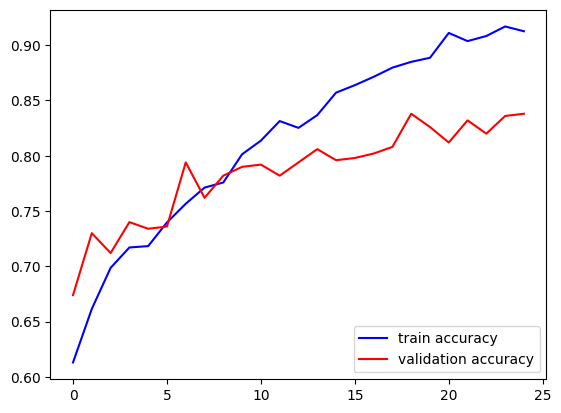

In [33]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn import metrics

In [35]:
y_pred =  np.argmax(model.predict(X_test_pad), axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(metrics.classification_report(y_pred, y_true))

77/77 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.53      0.80      0.64       813
           1       0.87      0.65      0.74      1635

    accuracy                           0.70      2448
   macro avg       0.70      0.73      0.69      2448
weighted avg       0.76      0.70      0.71      2448

